In [67]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, Flatten,\
                                    Reshape, LeakyReLU as LR,\
                                    Activation, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy as BCE
from tensorflow.keras.callbacks import EarlyStopping,LearningRateScheduler
from matplotlib import pyplot as plt
from IPython import display
import numpy as np

In [68]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255.0 #normalization to improve training
x_test = x_test/255.0

In [69]:
encoder = Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(512),
    LR(),
    Dropout(0.5),
    Dense(256),
    LR(),
    Dropout(0.5),
    Dense(128),
    LR(),
    Dropout(0.5),
    Dense(64),
    LR(),
    Dropout(0.5),
    Dense(32),
    LR(),
    Dropout(0.5),
    Dense(10, activation="sigmoid"),
])

In [70]:
decoder = Sequential([
    Dense(32, input_shape = (10,)),
    LR(),
    Dropout(0.5),
    Dense(64),
    LR(),
    Dropout(0.5),
    Dense(128),
    LR(),
    Dropout(0.5),
    Dense(256),
    LR(),
    Dropout(0.5),
    Dense(512),
    LR(),
    Dropout(0.5),
    Dense(784),
    Activation("sigmoid"),
    Reshape((28, 28))
])

In [71]:
img = Input(shape = (28, 28))
latent_vector = encoder(img)
output = decoder(latent_vector)
model = Model(inputs = img, outputs = output)
model.compile(optimizer=Adam(learning_rate=1e-3),
              loss=BCE())

In [72]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.fit(x_train, x_train, batch_size=64, epochs=100, validation_data=(x_test, x_test), callbacks=[early_stopping])

Epoch 1/100
938/938 [==============================] - 15s 13ms/step - loss: 0.2595 - val_loss: 0.2378
Epoch 2/100
938/938 [==============================] - 13s 14ms/step - loss: 0.2396 - val_loss: 0.2253
Epoch 3/100
938/938 [==============================] - 13s 14ms/step - loss: 0.2309 - val_loss: 0.2191
Epoch 4/100
938/938 [==============================] - 13s 14ms/step - loss: 0.2265 - val_loss: 0.2111
Epoch 5/100
938/938 [==============================] - 13s 14ms/step - loss: 0.2211 - val_loss: 0.2022
Epoch 6/100
938/938 [==============================] - 13s 14ms/step - loss: 0.2171 - val_loss: 0.1985
Epoch 7/100
938/938 [==============================] - 13s 14ms/step - loss: 0.2151 - val_loss: 0.1971
Epoch 8/100
938/938 [==============================] - 13s 14ms/step - loss: 0.2137 - val_loss: 0.1956
Epoch 9/100
938/938 [==============================] - 13s 14ms/step - loss: 0.2130 - val_loss: 0.1956
Epoch 10/100
938/938 [==============================] - 13s 14ms/step - l

In [73]:
p = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


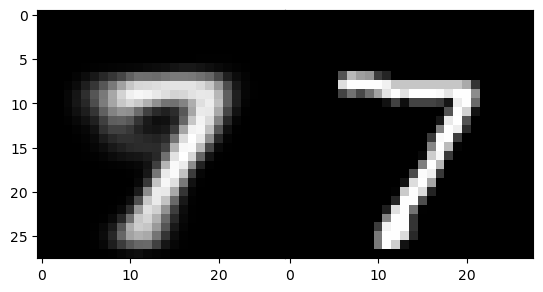

In [75]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(p[0], cmap = "gray")
axs[1].imshow(x_test[0], cmap = "gray")
plt.subplots_adjust(wspace = 0, hspace = 0)
plt.show()

In [76]:
x_train_enc = encoder.predict(x_train)
x_test_enc = encoder.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [77]:
np.savetxt('x_train_enc.txt', np.round(x_train_enc * 255).astype(int),fmt='%d')

In [78]:
np.savetxt('x_test_enc.txt', np.round(x_test_enc * 255).astype(int),fmt='%d')